In [1]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

# 1. Overview

In [32]:
df = pd.read_csv('/kaggle/input/predicting-depression-machine-learning-challenge/train.csv', index_col=0)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [33]:
df['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

In [34]:
column_types = {
    "numerical": [
        "Age",
        "Work/Study Hours"
        "CGPA",              # Has NA
    ],
    "ordinal": [
        "Academic Pressure", # Has NA
        "Study Satisfaction",# Has NA
        "Work Pressure",     # Has NA
        "Job Satisfaction",  # Has NA
        "Financial Stress",
    ],
    "categorical": [
        "Gender",
        "Working Professional or Student",
        "Dietary Habits",
        "Have you ever had suicidal thoughts ?", 
        "Family History of Mental Illness",
        "Sleep Duration",
    ],
    "categorical_high": [
        "City", 
        "Profession", # Has NA
        "Degree", 
    ],
    "target": "Depression"
}

In [35]:
df.dtypes

Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [36]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


# 2. Pre-processing

## Ordinal Columns

In [37]:
print(df.isna().sum())

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


Since the 6 fileds above with missing data tpyes are specific to students or working professionals, we well explore the two categories seprately in handling missing values

In [38]:
df['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [39]:
df_s = df[df["Working Professional or Student"] == "Student"]
df_w = df[df["Working Professional or Student"] == "Working Professional"]

In [40]:
print(df_s.isna().sum())

Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               27867
Academic Pressure                            9
Work Pressure                            27898
CGPA                                         9
Study Satisfaction                          10
Job Satisfaction                         27893
Sleep Duration                               0
Dietary Habits                               2
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             3
Family History of Mental Illness             0
Depression                                   0
dtype: int64


In [41]:
print(df_w.isna().sum())

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                 8763
Academic Pressure                        112794
Work Pressure                                20
CGPA                                     112793
Study Satisfaction                       112793
Job Satisfaction                             17
Sleep Duration                                0
Dietary Habits                                2
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              1
Family History of Mental Illness              0
Depression                                    0
dtype: int64


The following feature engineering approaches were considered:
1. Engineering features "Pressure" and "Satisfaction" that takes the "Academic/Study" value for students, and "Work/Job" value for Working Professionals
2. Mean or Mode Imputation
3. KNN Imputation

However, they provided no significant improvement to the model, and therefore the final implementation **constant imputation with -1** is used.

In [ ]:
for col in column_types['ordinal']:
    df[col].fillna(-1, inplace=True)

# Additionally also impute CGPA
df["CGPA"].fillna(-1, inplace=True)

## Categorical Columns

In [45]:
print(df.isna().sum())

Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64


In [46]:
df['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [47]:
df['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [48]:
df['Profession'].value_counts()

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

In [49]:
for col in column_types['categorical']:
    print(df[col].value_counts())
    print()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

Family History of Mental Illness
No     70758
Yes    69942


We will use simple constant imputation to handle "Profession", "Degree", "Dietary Habits", "City", and use Feature Engineering to handle the "Sleep Duration" column

- Mode imputation and KNN was tested, but "NA" and "Other" has overall better performance

In [50]:
df.loc[
    (df['Profession'].isna()) & (df['Working Professional or Student'] == 'Student'), 'Profession'
] = 'Student'

In [ ]:
cols = ["Profession", "Degree", "Dietary Habits", "City"]

for col in cols:
    
    df[col].fillna("NA", inplace=True)
    
    valid = df[col].value_counts()
    valid = valid[valid > 50].index.tolist()
    
    df[col] = df[col].apply(
        lambda x: x if x in valid else "Other"
    )

## Feature Engineering

In [ ]:
sleep_time_map = {
    "Less than 5 hours": 1.0,
    "5-6 hours": 2.0,
    "6-7 hours": 3.0,
    "7-8 hours": 4.0,
    "More than 8 hours": 5.0,
    "3-4 hours": 1.0,
    "4-5 hours": 1.0,
    "2-3 hours": 1.0,
    "4-6 hours": 2.0,
    "6-8 hours": 4.0,
}

df["Sleep Quality"] = df["Sleep Duration"].map(sleep_time_map)
df["Sleep Quality"].fillna(-1, inplace=True)

Lastly, we drop unnecessary columns

In [54]:
df = df.drop(columns=["Name", "Sleep Duration"], errors="ignore")

# 3. Exploratory Data Analysis

In [55]:
types_final = {
    "numerical": [
        "Age",
        "Work/Study Hours",
        "CGPA",
    ],
    "ordinal": [
        "Academic Pressure",
        "Study Satisfaction",
        "Work Pressure",
        "Job Satisfaction",
        "Financial Stress",
        "Sleep Quality",
    ],
    "categorical": [
        "Gender",
        "Working Professional or Student",
        "Dietary Habits",
        "Have you ever had suicidal thoughts ?", 
        "Family History of Mental Illness",
    ],
    "categorical_high": [
        "City", 
        "Profession",
        "Degree", 
    ],
    "target": "Depression"
}

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
correlation_matrix = df[types_final['ordinal'] + types_final['numerical']].corr()

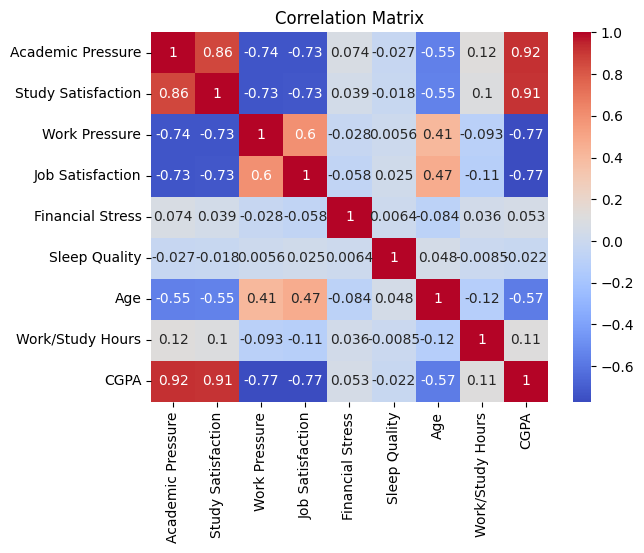

In [58]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

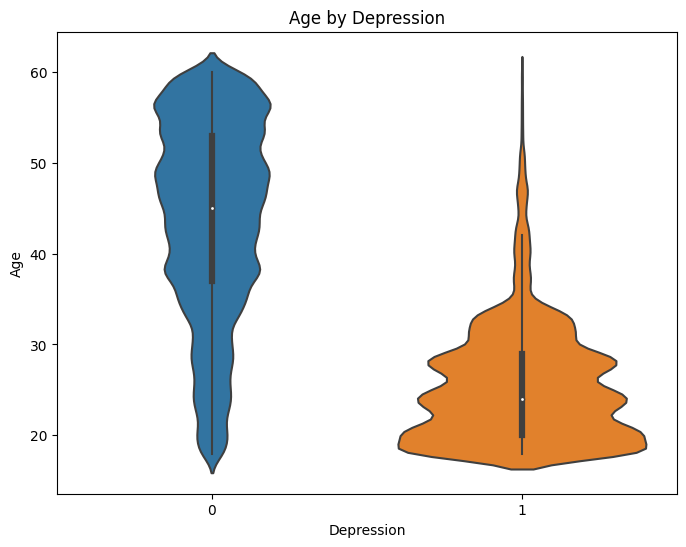

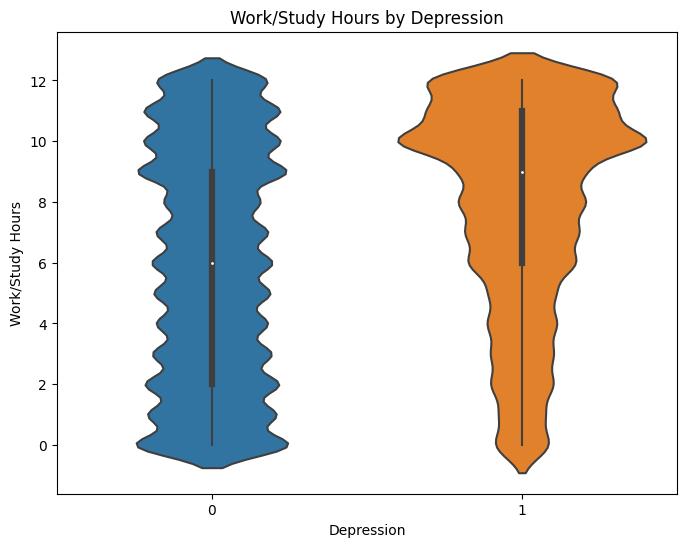

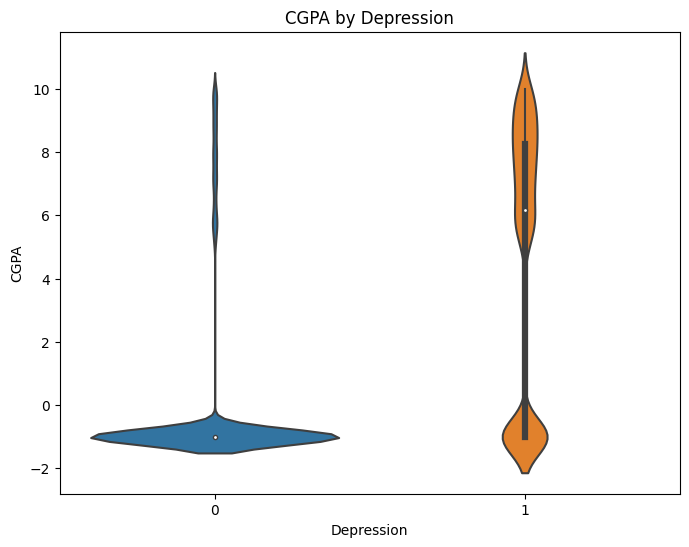

In [59]:
for feature in types_final['numerical']:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Depression', y=feature, data=df)
    plt.title(f'{feature} by Depression')
    plt.show()

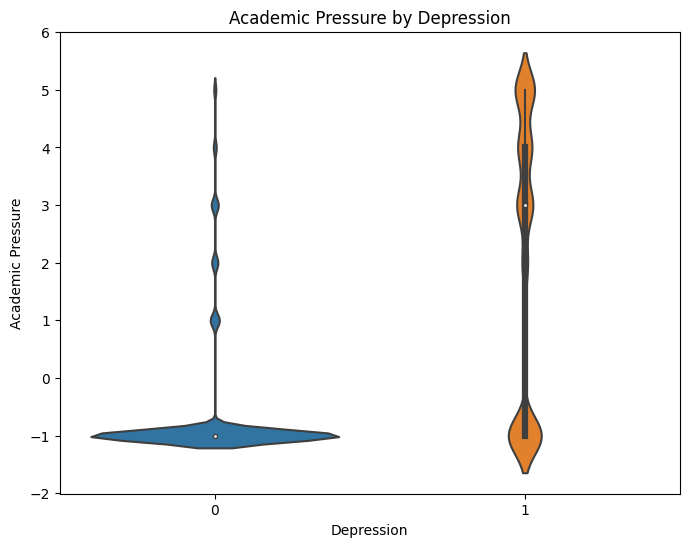

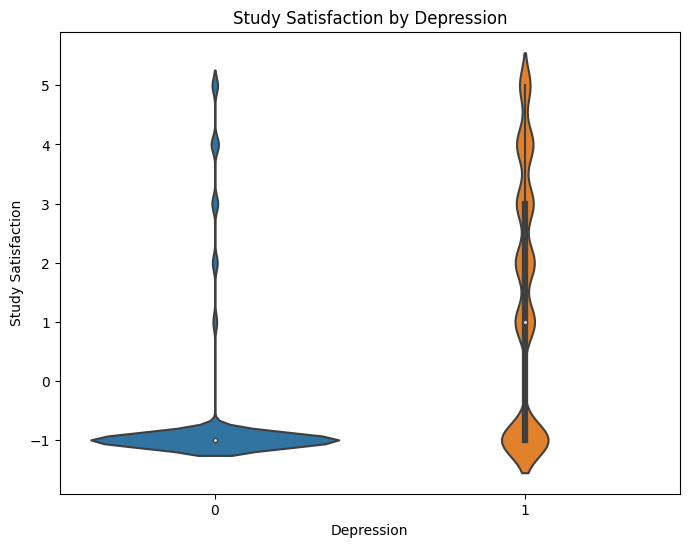

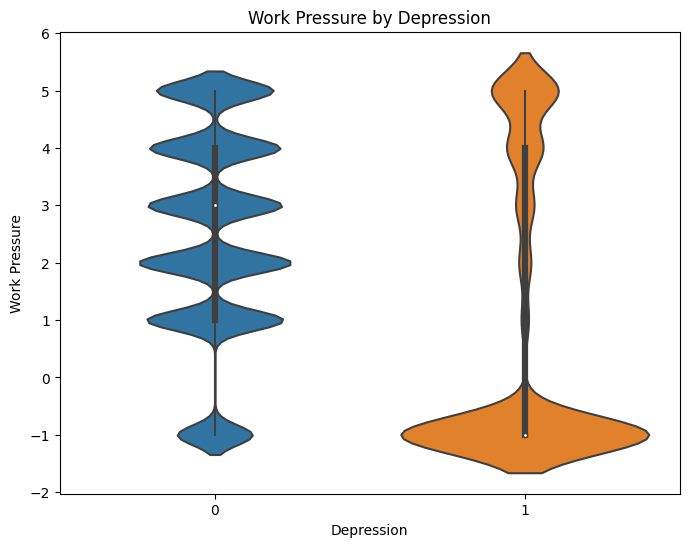

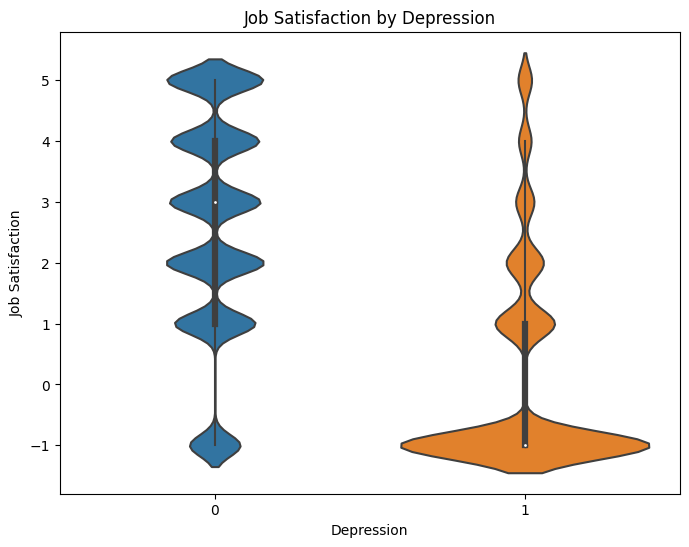

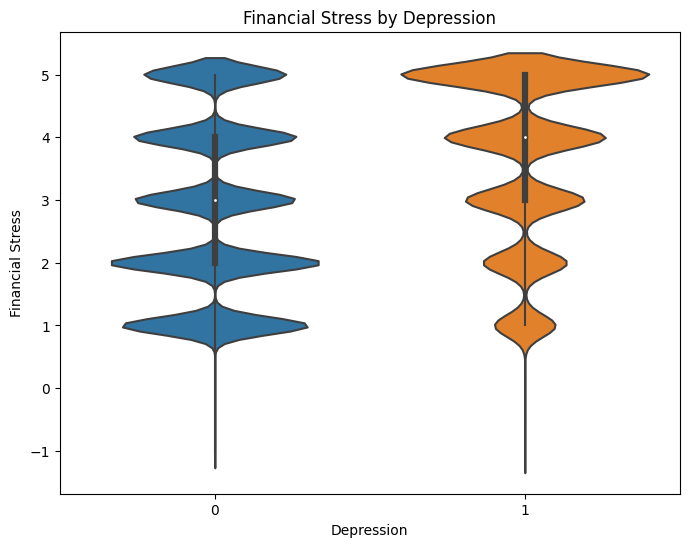

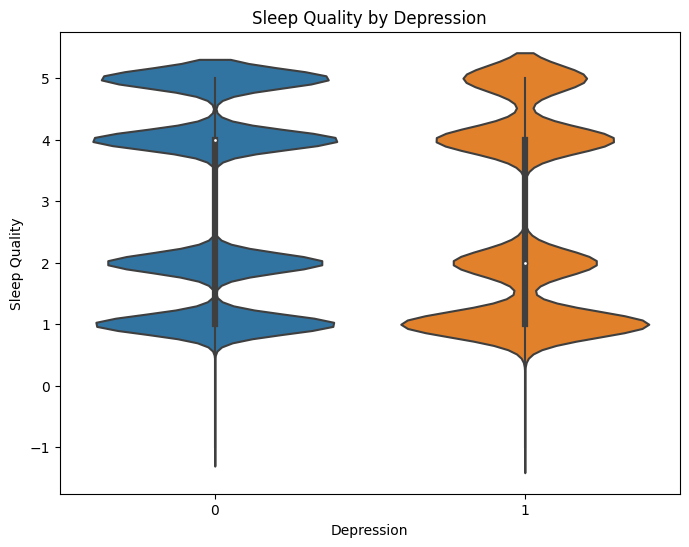

In [60]:
for feature in types_final['ordinal']:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Depression', y=feature, data=df)
    plt.title(f'{feature} by Depression')
    plt.show()

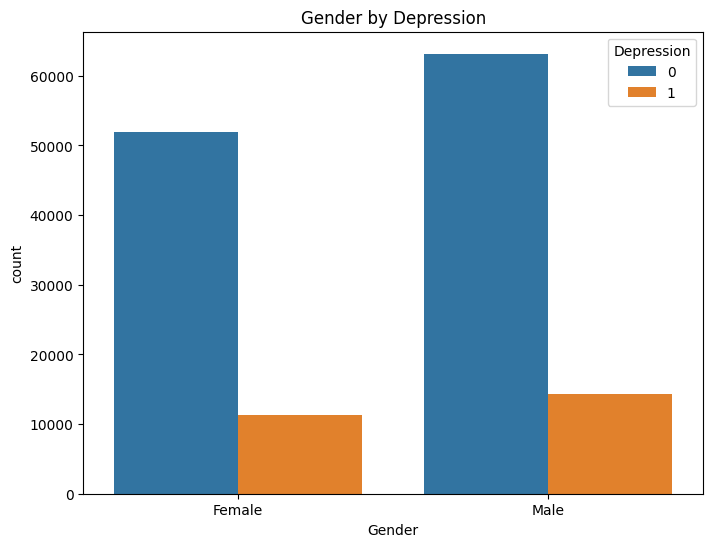

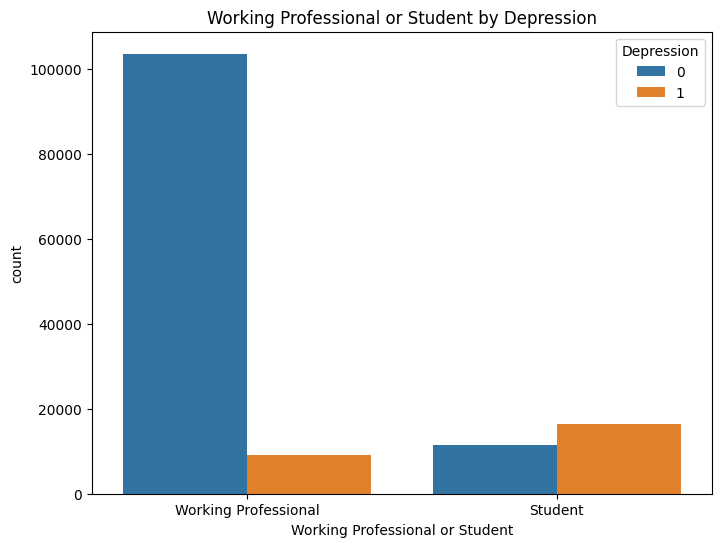

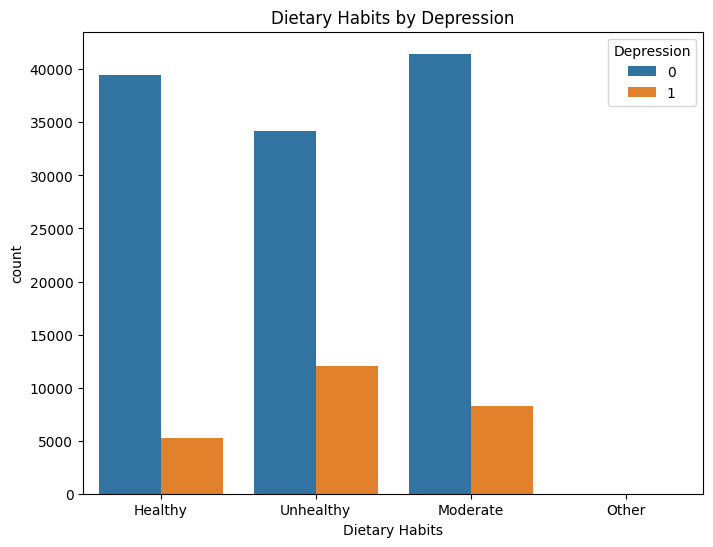

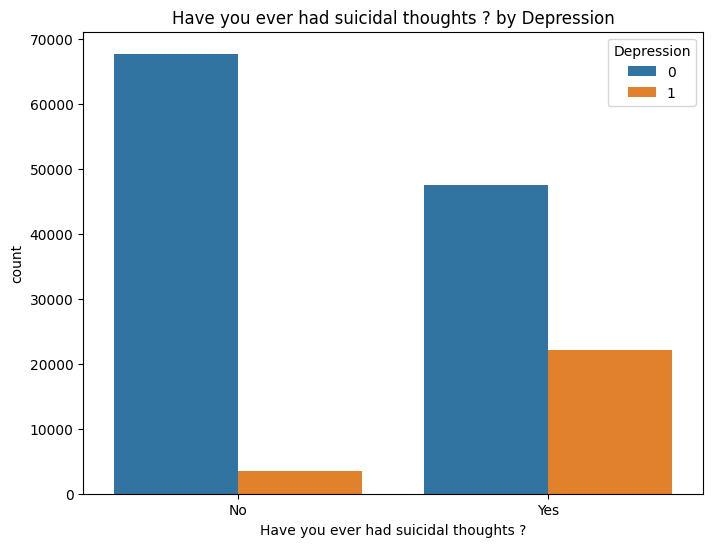

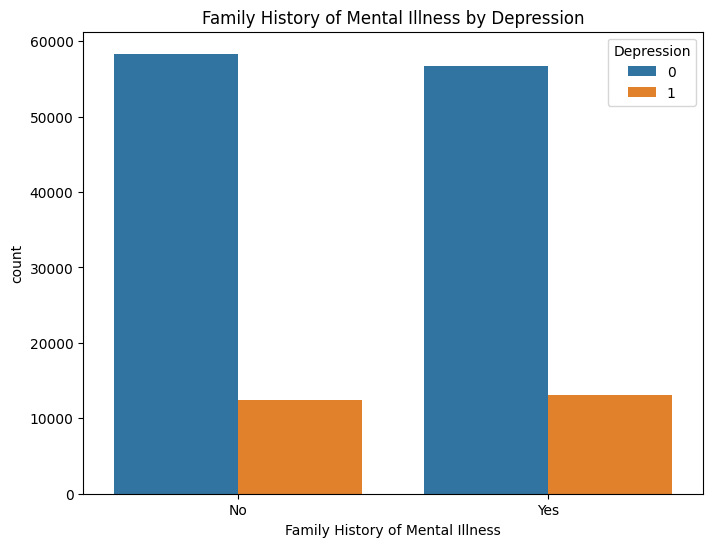

In [61]:
for feature in types_final['categorical']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Depression', data=df)
    plt.title(f'{feature} by Depression')
    plt.show()

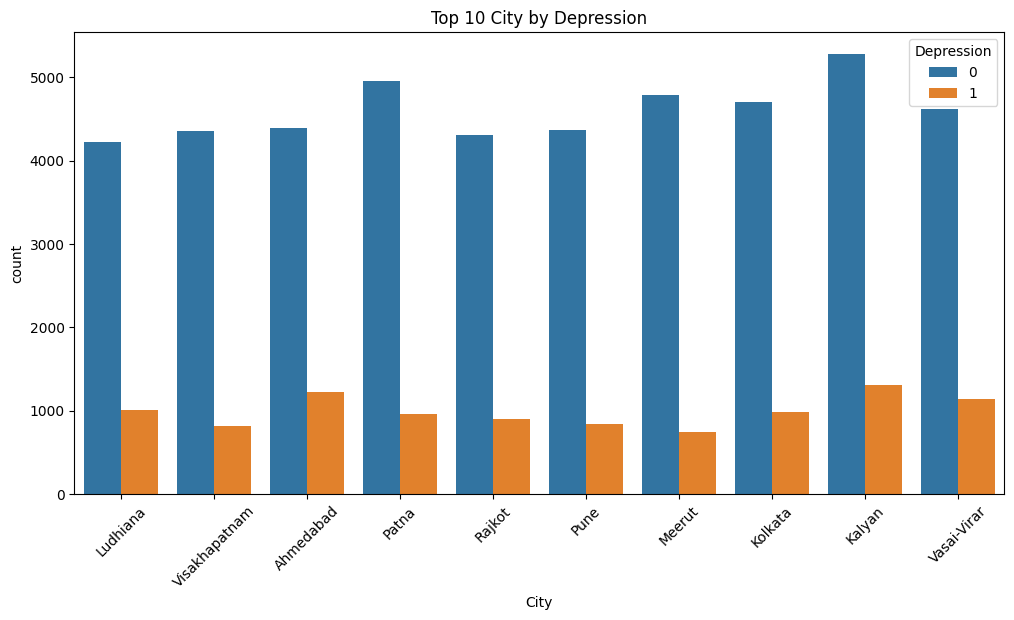

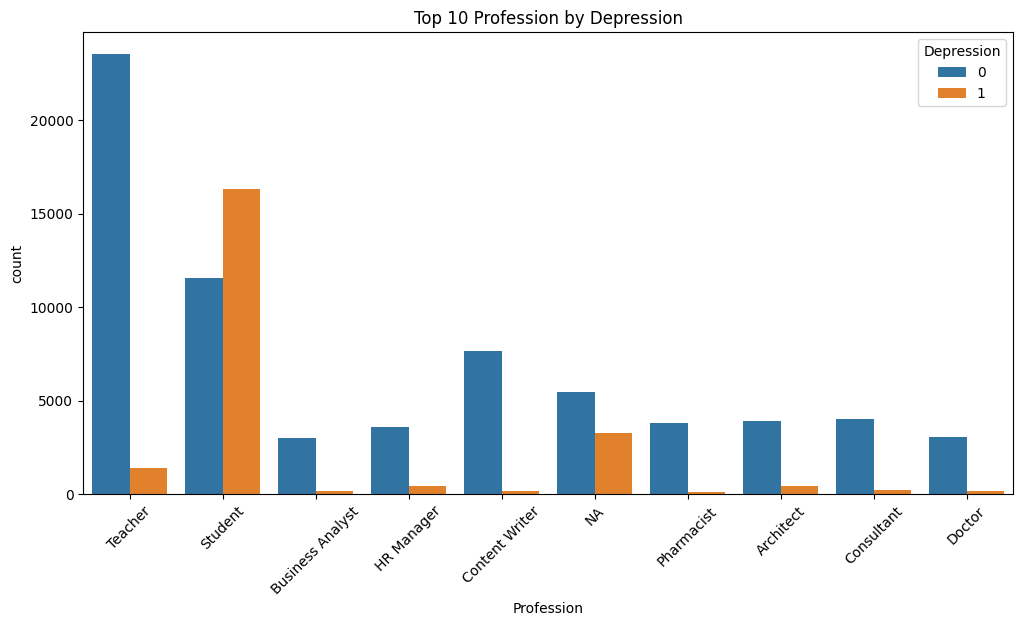

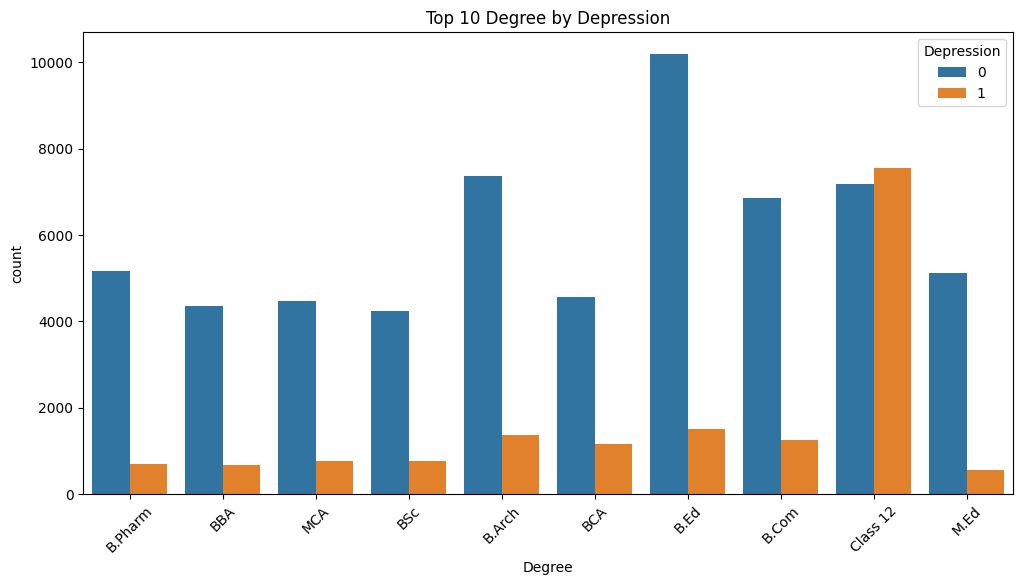

In [63]:
for feature in types_final['categorical_high']:
    plt.figure(figsize=(12, 6))
    top_n = 10
    top_categories = df[feature].value_counts().nlargest(top_n).index
    filtered_df = df[df[feature].isin(top_categories)]
    sns.countplot(x=feature, hue='Depression', data=filtered_df)
    plt.title(f'Top {top_n} {feature} by Depression')
    plt.xticks(rotation=45)
    plt.show()